# 항공사 지연 요인 분석 보고서

## 1. 프로젝트 개요
- 분석 목적: 항공사의 지연 요인(항공사, 관제, 기상)을 파악하여 개선 방향 제시
- 데이터 출처: 항공 운항 지연률 데이터 (총 33,468건)
- 분석 대상 변수:
    - pct_carrier_delay: 항공사 요인
    - pct_atc_delay: 관제 요인
    - pct_weather_delay: 기상 요인
    - airline: 항공사명

**데이터 출처**: https://www.kaggle.com/datasets/pitterman/airline-stats   
항공사 지연 정보 데이터

In [228]:
# 라이브러리 로드하기

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings(action='ignore')



In [229]:
# 한글 폰트 설정

# 시스템 환경에 따라 폰트를 자동으로 설정해주는 함수
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        return "AppleGothic"
    elif system_name == "Windows":
        return "Malgun Gothic"
    else:
        # Linux (Colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        return "NanumBarunGothic"

# 한글 폰트 적용
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 레티나 디스플레이 설정 (선명하게)
%config InlineBackend.figure_format = 'retina'


In [230]:
# 데이터 불러오기
df= pd.read_csv("../abc/data/airline_stats.csv")
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [231]:
# 데이터 샘플 보기

df.sample(5)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
17316,6.688525,10.672131,0.786885,United
21239,8.700000,1.025000,0.000000,Southwest
31441,6.163866,2.743697,0.357143,American
11188,7.484848,6.000000,0.000000,United
9481,6.518699,2.271545,0.026016,Southwest


In [232]:
# 인덱스 정보 보기

df.index

RangeIndex(start=0, stop=33468, step=1)

In [233]:
# 컬럼 정보 보기
df.columns

Index(['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay', 'airline'], dtype='object')

In [234]:

# 기본 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [235]:
# 데이터 타입 보기
df.dtypes

pct_carrier_delay    float64
pct_atc_delay        float64
pct_weather_delay    float64
airline               object
dtype: object

In [236]:
df.select_dtypes(include='number').head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


In [237]:
# 수치형변수의 최대/최소/평균값
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [238]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [239]:
#항공사별 기술통계 비교
df.groupby('airline')['pct_carrier_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


☝️ 해석:

> 항공사요인의 경우,   
> American 이 평균 9.04%, Jeb Blue 8.08% 순임   
> 표준편차가 가장 큰 항공사는 United 로 5.36이다. Delta(4.69) → 고객 경험일관성에 불리

In [240]:

df.groupby('airline')['pct_atc_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,5.472672,5.993529,4.462978,7.345231,3.147019,5.348133
std,5.699303,4.647170,4.364335,5.227372,2.513162,4.992464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.878614,3.108403,1.818182,3.784314,1.612527,2.431308
50%,3.776860,4.986523,3.508108,6.136905,2.559242,4.353647
75%,7.001330,7.594450,5.839901,9.612903,3.790421,7.030109
max,54.838710,60.000000,100.000000,40.986111,21.542722,100.000000


> ☝️ 해석:
>
> atc delay (관제 요인)은 Jet Blue(7.34%)가 가장 높음    
> → 운영 노선에 ATC 병목 구간 많을 수 있음.

In [241]:
df.groupby('airline')['pct_weather_delay'].describe().T


airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,0.513497,1.122920,0.680765,0.465327,0.512611,0.680697
std,1.136494,1.097811,1.093255,0.764147,0.649631,1.338433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.296719,0.000000,0.000000,0.105675,0.000000
50%,0.000000,0.884354,0.316406,0.157312,0.305598,0.263780
75%,0.497395,1.641725,0.893346,0.666667,0.663306,0.861395
max,14.633803,12.500000,20.500000,9.923077,6.240987,33.333333


> ☝️해석:
> 
> weather delay (기상 요인)은 전반적으로 낮지만,   
> 표준편차가 United(1.33%)로 큼.

In [242]:
df_clean = df.dropna()
df_clean

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


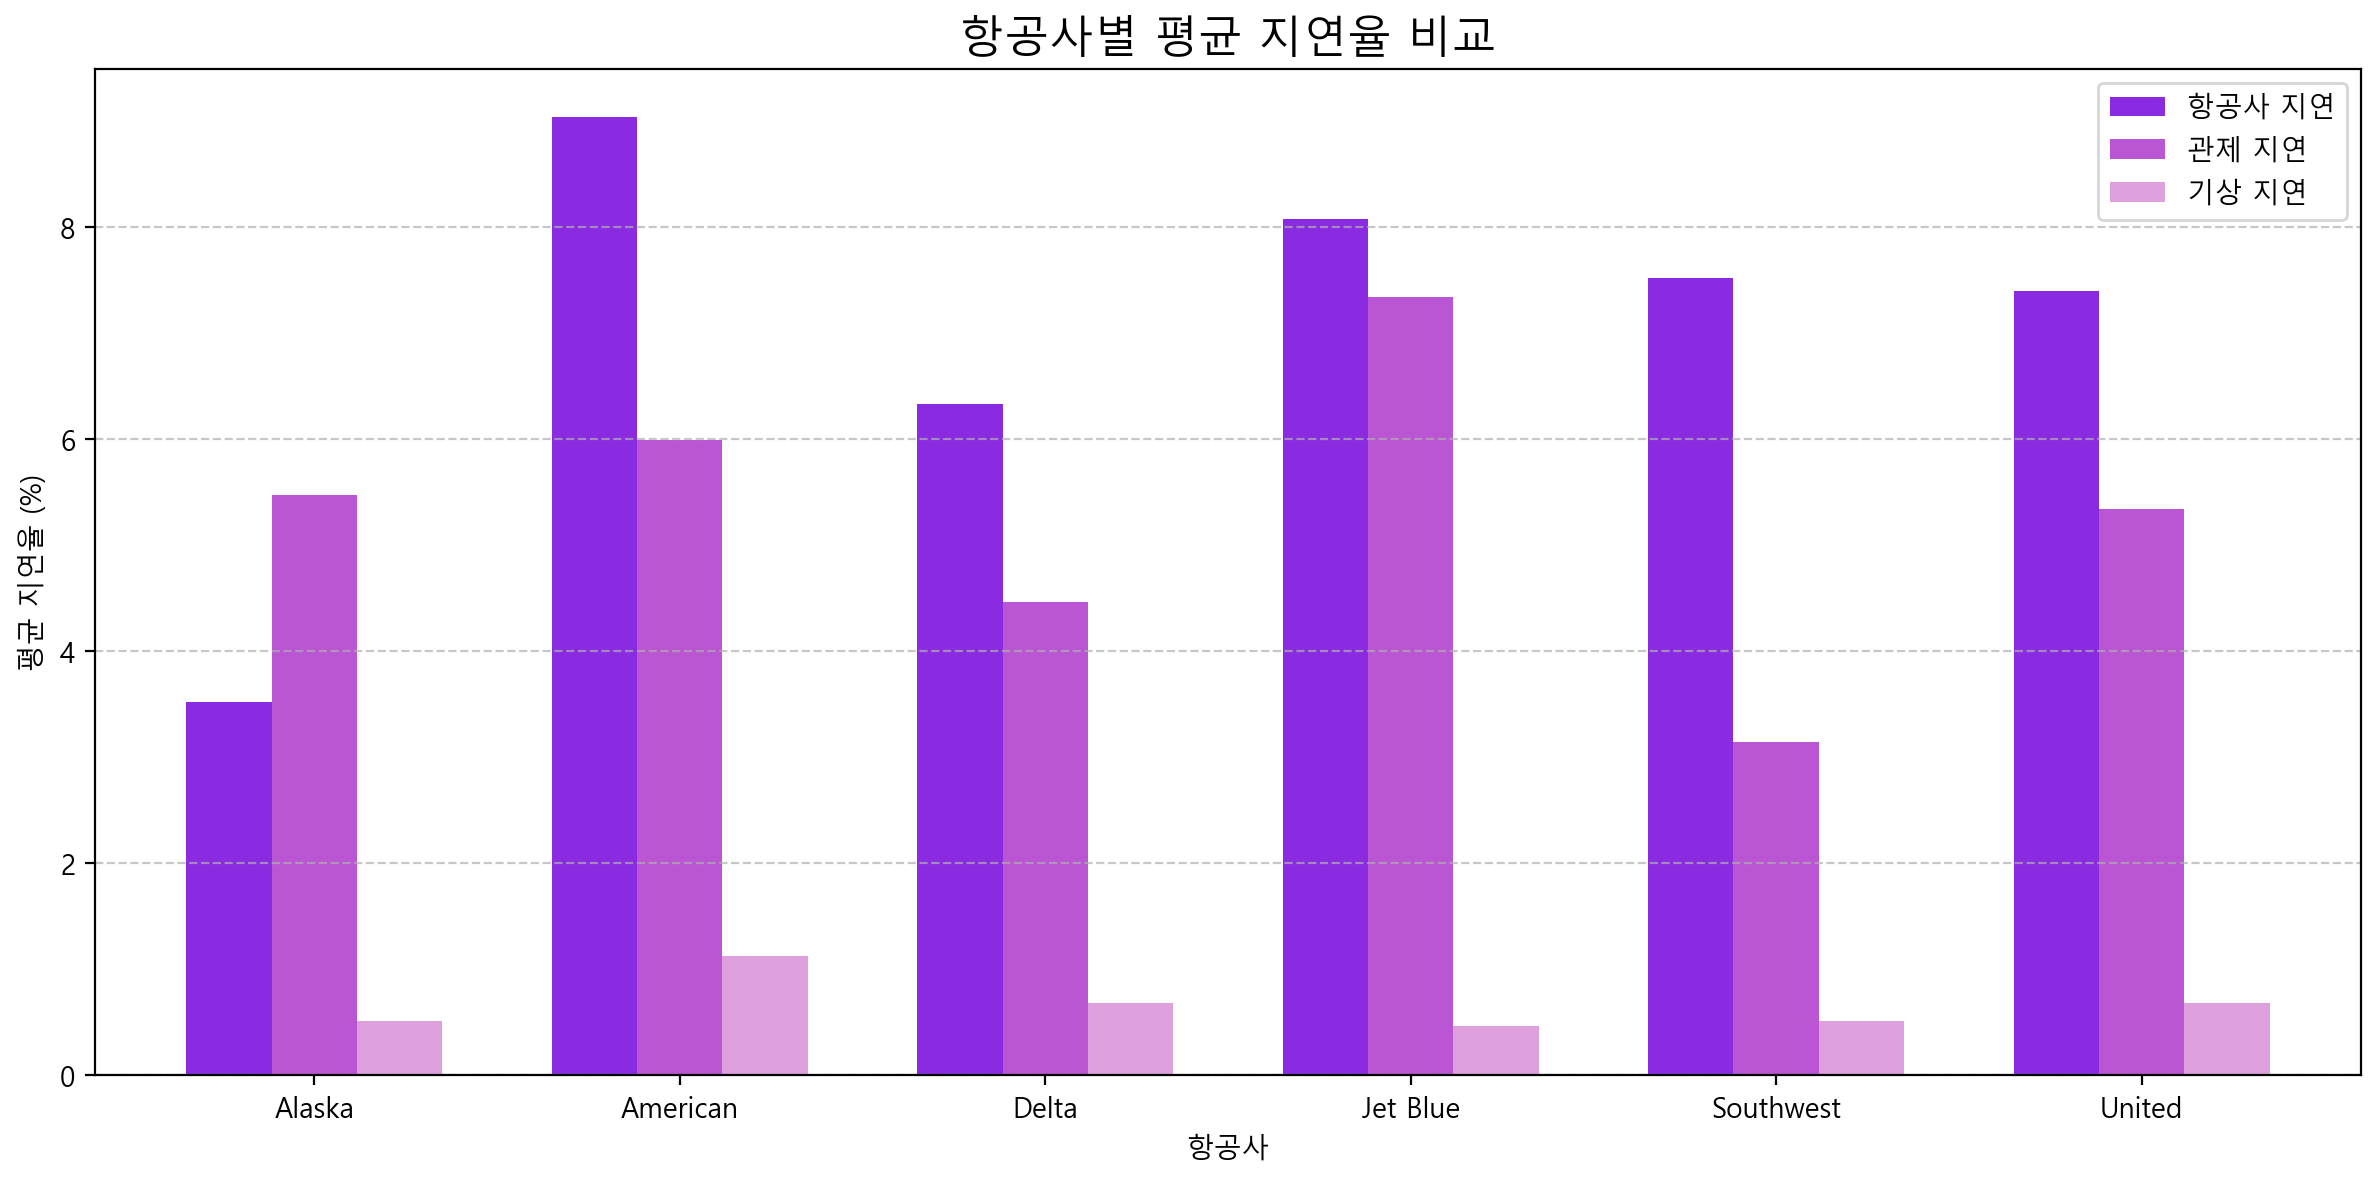

In [243]:
#1. 막대그래프 - 항공사별 평균 지연율


# 항공사별 평균 지연율 계산
delay_means = df_clean.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()

# 시각화를 위한 정렬: 항공사 이름 기준
delay_means = delay_means.sort_index()


# 막대그래프 그리기
delay_means.plot(kind='bar', figsize=(12, 6), width=0.7, color=['#8A2BE2', '#BA55D3', '#DDA0DD'])
plt.title('항공사별 평균 지연율 비교', fontsize=16)
plt.ylabel('평균 지연율 (%)')
plt.xlabel('항공사')
plt.xticks(rotation=0)
plt.legend(['항공사 지연', '관제 지연', '기상 지연'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

🔎 항공사별 운항 분석:

**1. 안정성을 갖춘 항공사**:   
Alaska: 관제 지연 제외한 모든 평균값이 가장 낮음 (표준편차도 낮음)   
(carrier: 3.52%, atc: 5.47%, weather: 0.51%)
➡️ Alaska는 항공기 지연률이 가장 안정적인 항공사로 판단할 수 있음

**2. 서비스 개선이 필요한 항공사**:
- American: 전체적으로 평균이 높고 편차가 큼
➡️ 내부 운영 개선, 기상 대책 필요
- Delta: weather delay는 평균, carrier/atc delay가 큼
➡️ 내부 개선과 항로 재배치 고려 필요

## 2. 데이터 전처리

### 2-1. 결측치 탐색
- 결측치가 있는 변수: `pct_carrier_delay`, `pct_atc_delay`, `pct_weather_delay` (각 28건)

### 2-2. 결측치 처리    
- 결측치는 세 가지 방식으로 처리 예정
  1. dropna(): 결측치 제거
  2. fillna(): 전체 평균으로 채움
  3. groupby + transform(): airline 그룹별 평균으로 채움
- 이후 각 처리 방식에 따라 지연률 분포 비교 예정


In [244]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [245]:
# 각 열별 결측치 비율
df.isna().mean().round(3)

pct_carrier_delay    0.001
pct_atc_delay        0.001
pct_weather_delay    0.001
airline              0.000
dtype: float64

In [246]:
# 결측치 포함된 행 보기
m_df = df[df.isnull().any(axis=1)]
m_df.head(5)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
4809,NaN,NaN,NaN,Jet Blue
6123,NaN,NaN,NaN,Jet Blue
7069,NaN,NaN,NaN,Delta
9241,NaN,NaN,NaN,Delta
12081,NaN,NaN,NaN,United


In [247]:
m_df['airline'].value_counts()

airline
Delta       12
United      12
Jet Blue     2
American     2
Name: count, dtype: int64

In [248]:
# 결측치 처리 > 방법 설명
# 1. 제거
df_clean = df.dropna()

In [249]:
#2. 대표값으로 대체
df_filled = df.fillna(df.mean(numeric_only=True))
df_filled

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [250]:
#3. airline 별 평균으로 대체
df_group_fill = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
  df_group_fill[col] = df.groupby('airline')[col].transform(lambda x:x.fillna(x.mean()))
df_group_fill.isna().sum()

pct_carrier_delay    0
pct_atc_delay        0
pct_weather_delay    0
airline              0
dtype: int64

In [251]:
#  결측치 처리한 데이터의 통계량 비교
d_clean = df_clean.describe().add_prefix('drop_')
d_filled = df_filled.describe().add_prefix('filled_')
d_group = df_group_fill.describe().add_prefix('group_')
d_comp = pd.concat([d_clean, d_filled, d_group], axis=1)
d_comp.T

,count,mean,std,min,25%,50%,75%,max
drop_pct_carrier_delay,33440.0,7.041475,4.497596,0.0,4.145455,6.356893,9.140474,100.000000
drop_pct_atc_delay,33440.0,5.089962,4.718647,0.0,2.146565,3.900000,6.630238,100.000000
drop_pct_weather_delay,33440.0,0.684776,1.073743,0.0,0.000000,0.316002,0.935161,33.333333
filled_pct_carrier_delay,33468.0,7.041475,4.495714,0.0,4.147084,6.359631,9.136141,100.000000
filled_pct_atc_delay,33468.0,5.089962,4.716672,0.0,2.148281,3.903367,6.625000,100.000000
filled_pct_weather_delay,33468.0,0.684776,1.073294,0.0,0.000000,0.316655,0.934579,33.333333
group_pct_carrier_delay,33468.0,7.041531,4.495773,0.0,4.147084,6.357260,9.136141,100.000000
group_pct_atc_delay,33468.0,5.090018,4.716727,0.0,2.148281,3.903367,6.626106,100.000000
group_pct_weather_delay,33468.0,0.684786,1.073301,0.0,0.000000,0.316655,0.934579,33.333333


In [252]:
d_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   drop_pct_carrier_delay    8 non-null      float64
 1   drop_pct_atc_delay        8 non-null      float64
 2   drop_pct_weather_delay    8 non-null      float64
 3   filled_pct_carrier_delay  8 non-null      float64
 4   filled_pct_atc_delay      8 non-null      float64
 5   filled_pct_weather_delay  8 non-null      float64
 6   group_pct_carrier_delay   8 non-null      float64
 7   group_pct_atc_delay       8 non-null      float64
 8   group_pct_weather_delay   8 non-null      float64
dtypes: float64(9)
memory usage: 940.0+ bytes


☝️결측치 해석
1. 수량
- `dropna`: 33,440건 ➡️ 결측치(28건 제거)
- `filled_`, `group_`: 33,468건 ➡️ 전체 데이터 유지


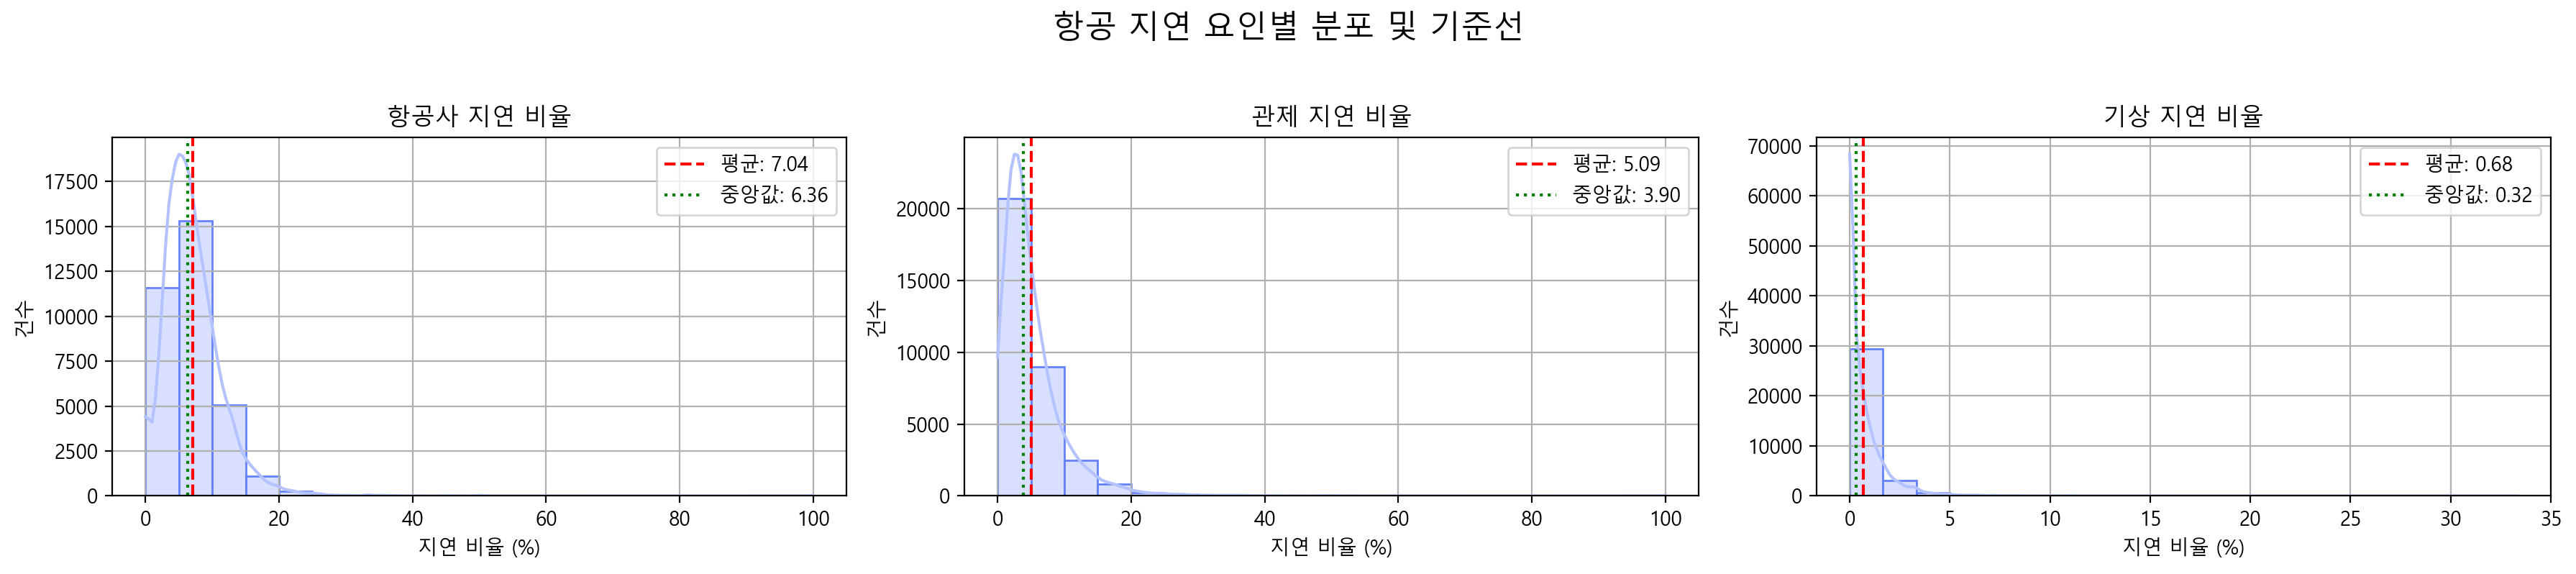

In [253]:
# 시각적 분석 > #1. 히스토그램

# 지연 요인 리스트
delay_cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']
titles = ['항공사 지연 비율', '관제 지연 비율', '기상 지연 비율']

# Subplot
plt.figure(figsize=(18, 4))

for i, col in enumerate(delay_cols):
    plt.subplot(1, 3, i + 1)

    # seaborn의 histplot 사용 (kde=True)
    sns.histplot(df_clean[col], bins=20, kde=True, color='#B4C3FF', edgecolor='#6482FF')

    # 평균선
    mean_val = df_clean[col].mean()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'평균: {mean_val:.2f}')

    # 중앙값선
    median_val = df_clean[col].median()
    plt.axvline(median_val, color='green', linestyle=':', label=f'중앙값: {median_val:.2f}')

    # 기타 설정
    plt.title(titles[i])
    plt.xlabel('지연 비율 (%)')
    plt.ylabel('건수')
    plt.legend()
    plt.grid(True)

plt.suptitle('항공 지연 요인별 분포 및 기준선', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



> ☝️분석 결과:
>
> **지연 요인별로 분리(`항공사`, `관제`, `기상`)**     
>  **① 항공사 지연 비율** (`Carrier Delay`)      
> 평균: 7.04%, 중앙값: 6.36%   
> 분포 형태: 왼쪽에 치우친 우측 비대칭(positive skew)   
> 해석:
>    - 대부분의 항공사 지연은 0~10% 구간에 몰려 있음   
>    - 일부 항공편에서 20~60% 이상 지연도 존재 → 이상치 영향으로 평균이 중앙값보다 큼
>
> **② 관제 지연 비율 (`ATC Delay`)**   
> 평균: 5.09%, 중앙값: 3.90%
> 분포 형태: 역시 우측 비대칭   
>       해석:
>    - 대다수 항공편은 관제로 인해 5% 미만 지연   
>    - 간혹 40~80%까지도 존재 → 역시 평균이 중앙값보다 큼   
>    - 정책적으로 ATC 혼잡 시간대 분석이 중요
>
> **③ 기상 지연 비율 (`Weather Delay`)**   
> 평균: 0.68%, 중앙값: 0.32%   
> 분포 형태: 매우 심하게 왼쪽에 몰려 있음 (거의 대부분 0~2% 내)    
>   해석:
>    - 기상은 전체 지연의 주요 원인이라 보기 어려움   
>    - 일부 극단적인 날씨 조건에서만 지연이 큼 → 대응 방안은 선별적으로 접근 가능


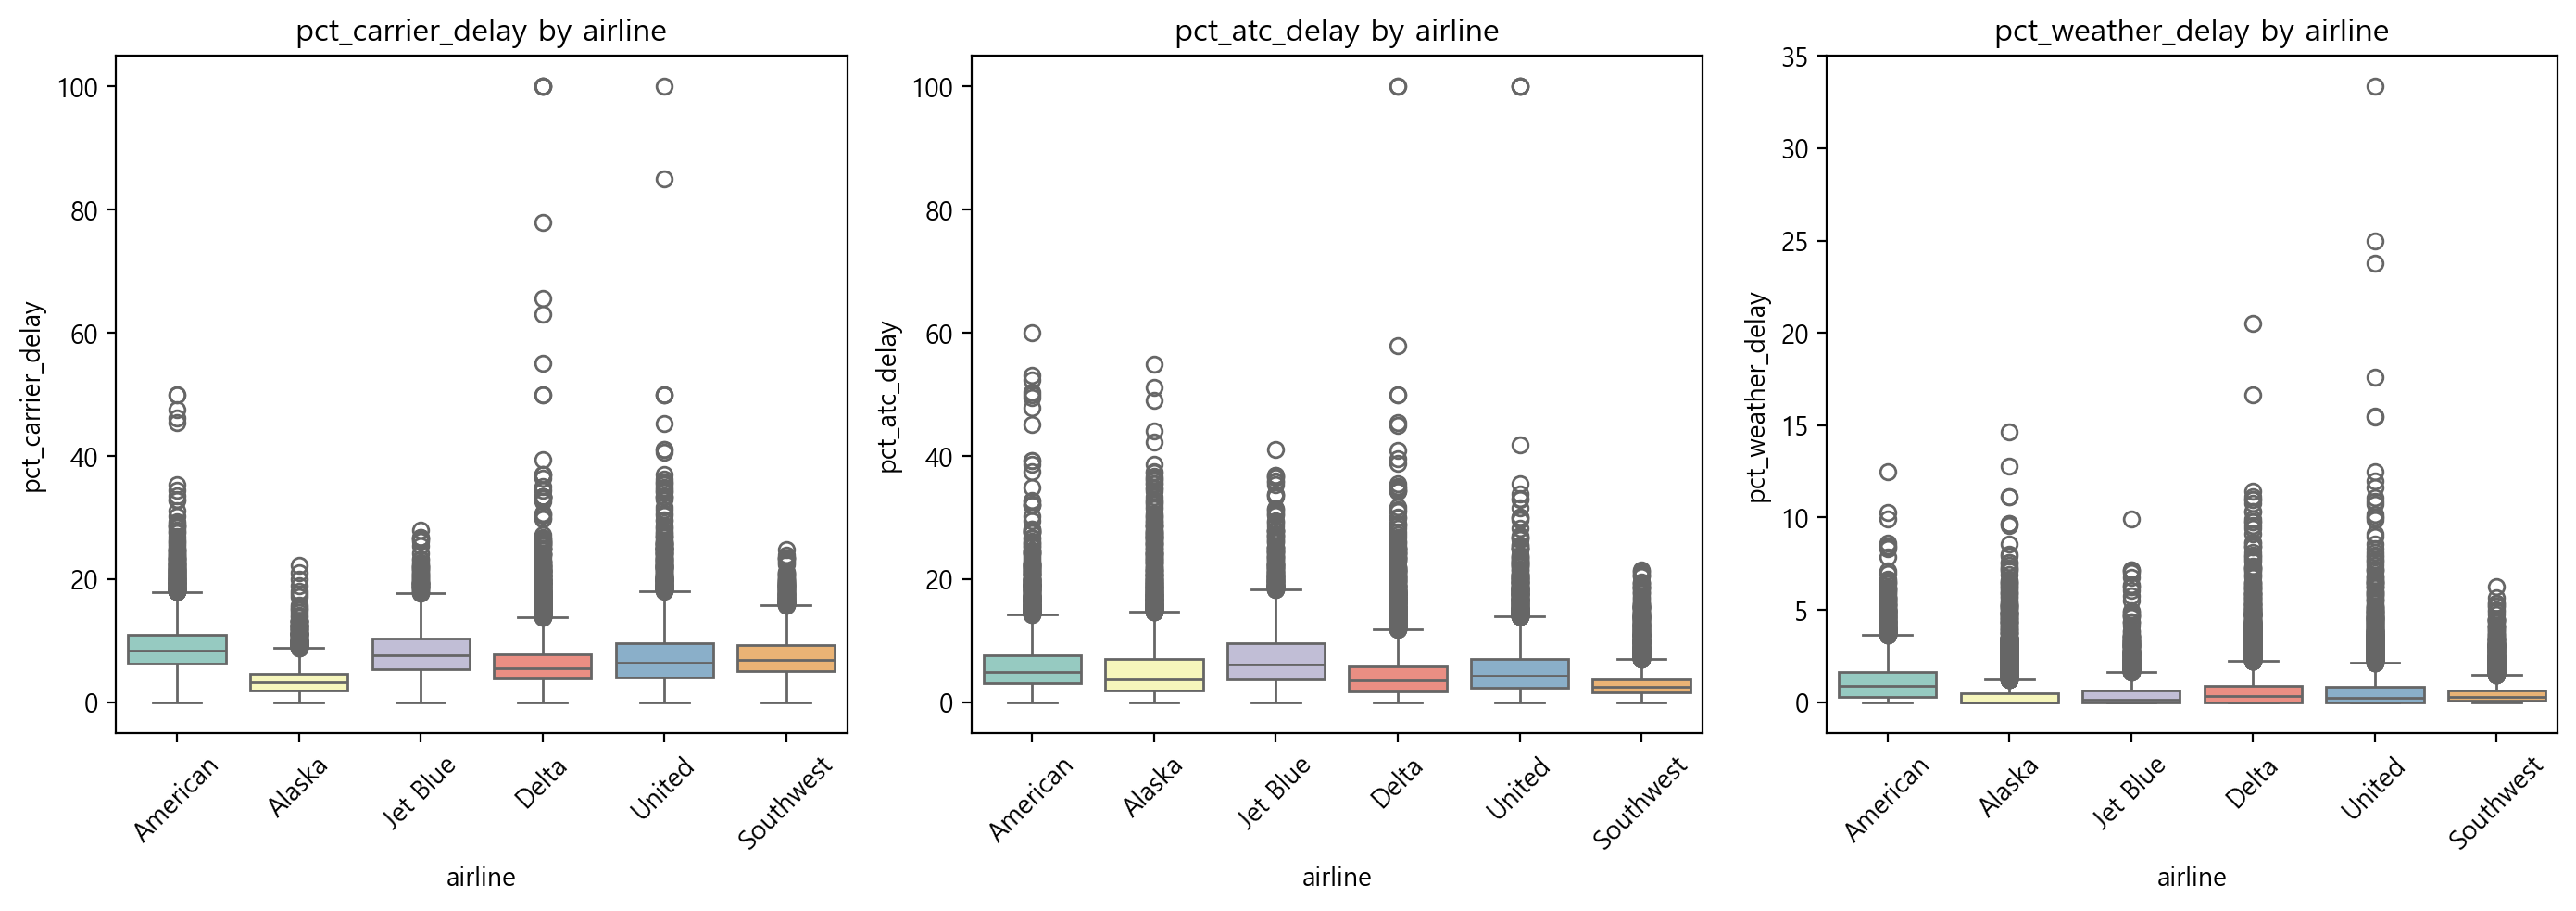

In [254]:
#2. 박스플롯 - 전체, 항공사별 분석


# 전체 항공사별 박스플롯
plt.figure(figsize=(14, 5))
for idx, col in enumerate(['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']):
    plt.subplot(1, 3, idx+1)
    sns.boxplot(x='airline', y=col, data=df_clean, palette="Set3")
    plt.title(f"{col} by airline")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> ☝️분석 결과:
> 1. 항공사 내부 사정 (pct_carrier_delay)
> - American, Jet Blue, United 등의 지연율이 높은 편   
> - 극단적인 이상치(100%)도 다수 존재 → 특정 항공편 문제 가능성   
> - Alaska는 평균도 낮고 이상치도 적음
>
> 2. 관제 지연 (pct_atc_delay)   
> - 전체적으로 분산이 큼 (특히 Alaska, American)   
> - 항공사 간 큰 차이는 없지만 일부는 50% 이상도 존재   
> 
> - 3. 기상 지연 (pct_weather_delay)   
> - 전반적으로 지연률이 낮음 (0~5% 수준이 대부분)   
> - Delta, United에서 간혹 20~30% 이상 발생 → 특정 노선 또는 시기 가능성


### 이 시각화를 바탕으로,

1. 항공사별 개선 포인트 도출   
2. 가장 지연율이 높은 요인 중심으로 분석 심화   
3. 예방 가능한 지연 요인 중심의 정책 제안

In [255]:
# 추가 분석

# 항공사별 평균 지연율 비교
delay_means = df_clean.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean().sort_values(by='pct_carrier_delay', ascending=False)
delay_means


,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
American,9.042180,5.993529,1.122920
Jet Blue,8.081843,7.345231,0.465327
Southwest,7.521997,3.147019,0.512611
United,7.398833,5.348133,0.680697
Delta,6.333460,4.462978,0.680765
Alaska,3.521889,5.472672,0.513497


> ☝️ 분석 결과:
> 
> - 항공사별로 어떤 지연 요인에 많이 노출되는지 수치로 확인   
> - 향후 개선 방향 도출을 위한 핵심 표

In [256]:
# 항공사별로 지연 사유에 대한 기술통계 요약 (describe)
grouped_desc = df.groupby("airline")[["pct_carrier_delay", "pct_atc_delay", "pct_weather_delay"]].describe().round(2)

# mean, std만 추출해 피벗 형태로
summary_stats = grouped_desc.loc[:, (slice(None), ["mean", "std"])]
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
summary_stats.reset_index(inplace=True)

summary_stats


,airline,pct_carrier_delay_mean,pct_carrier_delay_std,pct_atc_delay_mean,pct_atc_delay_std,pct_weather_delay_mean,pct_weather_delay_std
0,Alaska,3.52,2.48,5.47,5.70,0.51,1.14
1,American,9.04,4.14,5.99,4.65,1.12,1.10
2,Delta,6.33,4.70,4.46,4.36,0.68,1.09
3,Jet Blue,8.08,3.80,7.35,5.23,0.47,0.76
4,Southwest,7.52,3.35,3.15,2.51,0.51,0.65
5,United,7.40,5.37,5.35,4.99,0.68,1.34


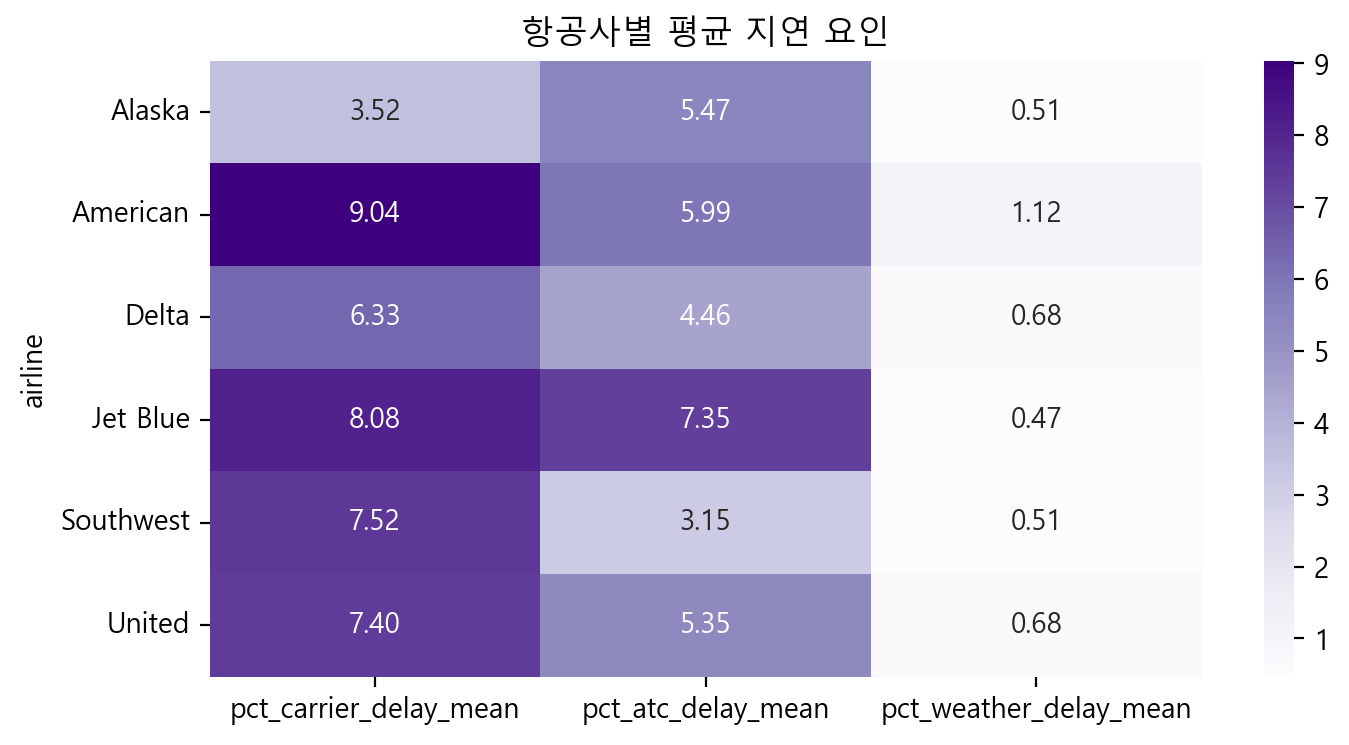

In [257]:
# 항공사별 지연률 평균만 뽑기
heat_data = summary_stats.set_index("airline")[[
    "pct_carrier_delay_mean",
    "pct_atc_delay_mean",
    "pct_weather_delay_mean"
]]

plt.figure(figsize=(8, 4))
sns.heatmap(heat_data, annot=True, cmap="Purples", fmt=".2f")
plt.title("항공사별 평균 지연 요인")
plt.show()


☝️ 해석 설명:

| 항공사           | 가장 진한 셀                         | 주요 지연 요인                |
| ------------- | ------------------------------- | ----------------------- |
| **American**  | `pct_carrier_delay_mean = 9.04` | **항공사 내부 지연** 가장 높음     |
| **Jet Blue**  | `pct_atc_delay_mean = 7.35`     | **관제 지연**도 높은 편, 내부도 높음 |
| **Alaska**    | `pct_atc_delay_mean = 5.47`     | **관제 지연**이 상대적으로 높음     |
| **Southwest** | `pct_carrier_delay_mean = 7.52` | 내부 지연 비율 큼              |
| **United**    | 전체적으로 고르게 높음                    | 전반적 지연 위험 관리 > 필요         |
| **Delta**     | 지연 비율 전반적으로 낮음                  | **우수한 정시성 관리**로 > 해석 가능   |



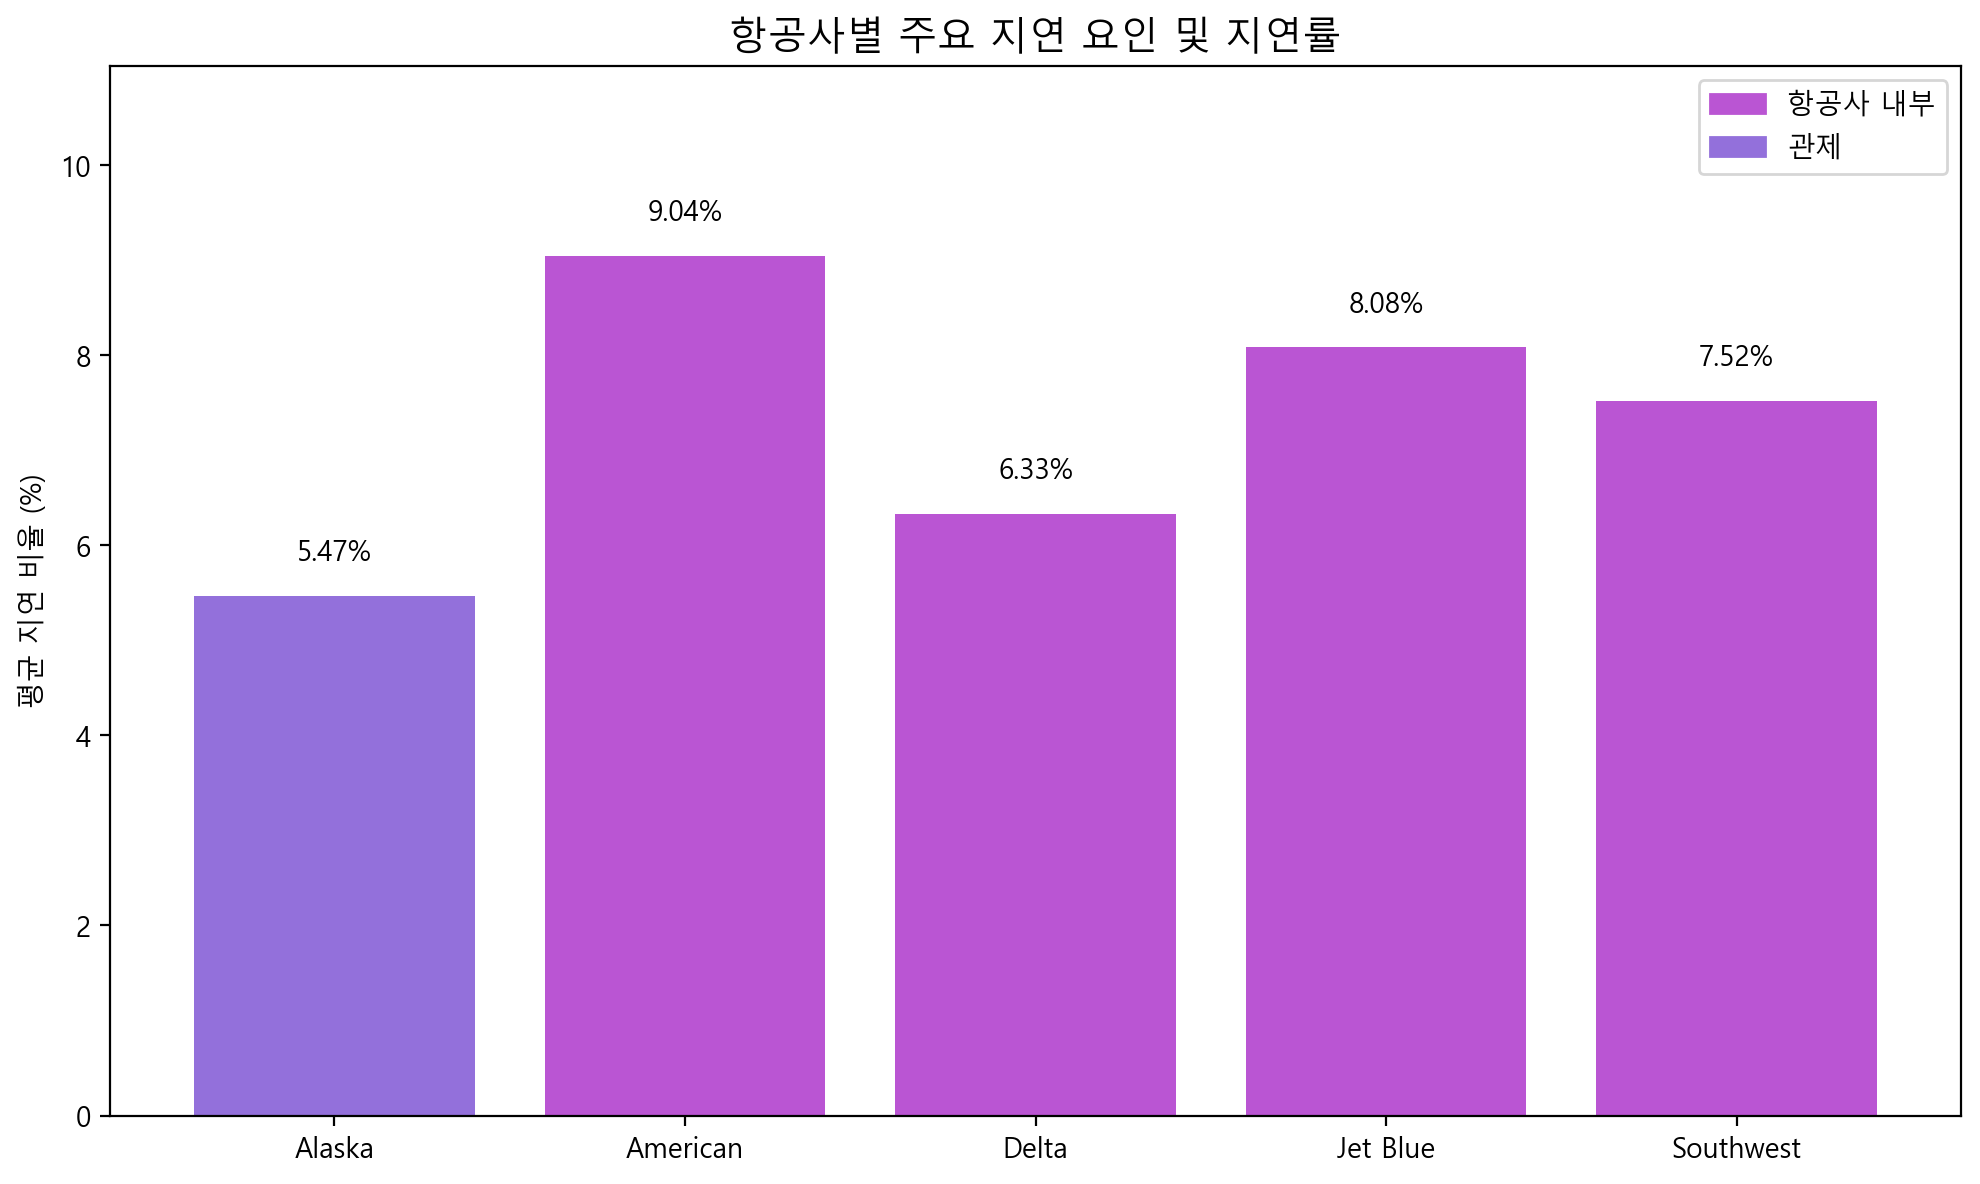

In [262]:
# 상관관계 분석
# 항공사 이름
airlines = ["Alaska", "American", "Delta", "Jet Blue", "Southwest"]

# 주요 지연 요인에 따른 지연률
delay_values = [5.47, 9.04, 6.33, 8.08, 7.52]
delay_reasons = ["관제", "항공사 내부", "항공사 내부", "항공사 내부", "항공사 내부"]
colors = ["#9370DB" if reason == "관제" else "#BA55D3" for reason in delay_reasons]

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(airlines, delay_values, color=colors)

# 각 바 위에 지연률 표시
for bar, val in zip(bars, delay_values):
    plt.text(bar.get_x() + bar.get_width() / 2, val + 0.3, f"{val}%", ha='center', va='bottom', fontsize=10)

# 제목 및 라벨
plt.title("항공사별 주요 지연 요인 및 지연률", fontsize=14)
plt.ylabel("평균 지연 비율 (%)")
plt.ylim(0, max(delay_values) + 2)

# 범례 수동 생성
import matplotlib.patches as mpatches
legend_labels = [
    mpatches.Patch(color="#BA55D3", label="항공사 내부"),
    mpatches.Patch(color="#9370DB", label="관제")
]
plt.legend(handles=legend_labels, loc="upper right")

plt.tight_layout()
plt.show()



> ☝️ 해석 예시:
>
> 항공사 내부 사유: `American`,`Delta`,`Jet Blue`, `Southwest` (지연률도 높은 편)   
>➡️ 정비, 인력 스케줄링, 지상 운영 등 내부 프로세스 개선이 시급
>
> 관제사유: `Alaska`   
> ➡️ 혼잡 시간대 운항 조정이나 관제 슬롯 협의 등의 전략 필요

In [263]:
#5. 공분산 확인

df_clean[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].cov()


,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,20.228366,3.066107,0.779800
pct_atc_delay,3.066107,22.265627,0.464758
pct_weather_delay,0.779800,0.464758,1.152925


> ☝️ 분석 결과: 
> - 관제 지연과 항공사 내부 지연은 공분산 3.07 ➡️ 조금 함께 움직이는 경향     
> - 기상 지연은 대부분 다른 원인과 약한 상관 ➡️ 즉, 기상은 외생적 변수, 제어 어려움
> - 지연 완화를 위해서는 carrier, atc 관련 조정이 우선

## 개선 방향 예시

| 항공사 | 분석결과     | 개선 제안                     |
| --- | ------------ | ------------------------- |
| American, Jet Blue | 고지연 항공사 | 내부 프로세스 개선, 인력 스케줄링 재정비   |
| Alaska | 관제 지연이 높음    | 출발/도착 시간 분산, 외부 환경 고려한 운항 전략 수립 > 필요      |



 ## 📊 분석 결과 요약
 
 | 지연 요인                         | 분석 결과 요약                                                                                                                                  | 개선 방향 제안                                                 |
 | ----------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------- |
 | **항공사 내부<br>(Carrier Delay)** | • 전체 항공사 중 **가장 높은 평균 지연률** (최대 9.04%)<br>• **American, Jet Blue, Southwest** 등 대부분 항공사에서 주요 지연 원인<br>• > **공분산과 표준편차도 큼** → 항공사 간 관리 편차 존재 | - 정비 인력 및 자원 확충<br>- 운항 회전률 최적화<br>- 수속·탑승 지연 프로세스 개선    |
 | **관제 지연<br>(ATC Delay)**      | • **Alaska, Jet Blue**에서 상대적으로 높은 비중 (최대 7.35%)<br>• 공분산 계수 3.07로 **항공사 내부와 다소 연관성 있음**<br>• 외부 요인이지만 항공사 전략에 따라 **완화 가능성 존재**            | - 혼잡 시간대 회피<br>- 항로 사전 조정 협의<br>- 관제 당국과 커뮤니케이션 강화       |
 | **기상 지연<br>(Weather Delay)**  | • 전체적으로 **가장 낮은 평균 지연률** (대부분 1% 이하)<br>• 공분산/상관관계 모두 낮음 → **독립적이고 예측 어려운 외부 변수**<br>• 계절·지역별 편차 존재                                       | - 기상 리스크 예측 시스템 개선<br>- 계절별 대응 매뉴얼 구축<br>- 지연 시 고객 응대 강화 |


## 📋다음 분석 방향 계획

| 분석 항목                    | 목적 및 기대 효과                                       | 방식 예시                                  |
| ------------------------ | ------------------------------------------------ | -------------------------------------- |
| **항공사별 지연 사유 상관관계 분석**   | 각 항공사에서 특정 지연 원인이 다른 요인과 함께 발생하는 경향 파악           | `groupby('airline')` + `corr()` 히트맵    |
| **계절/월별 지연률 패턴 분석**      | 계절성(성수기·비성수기), 기상 영향 등 시간 축 요인 파악                | `month` 파생 후 시계열 시각화                   |
| **항공사별 분산/표준편차 시각화**     | 평균이 아닌 변동성 중심 비교 → 지연의 안정성 파악 가능                 | `std()` 계산 후 barplot / heatmap         |
| **지연률 기준 Top/Bottom 분석** | 지연률이 가장 높거나 낮은 항공편/노선 추출 → 특이 케이스 분석용            | `nlargest`, `nsmallest` 사용             |
| **기계 학습 기반 지연 예측 모델링**   | 향후 지연 발생 가능성 예측 → 정책 시뮬레이션 또는 사전 대응 전략 수립 가능     | `RandomForest`, `LogisticRegression` 등 |
| **고객 관점 영향 분석**          | 지연이 고객 이탈/불만족에 미치는 정성적 분석 (만약 설문, 평점 등 데이터가 있다면) | 외부 데이터 결합 (NPS, 리뷰 등)                  |
